In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train_data =pd.read_excel(r'F:\Downloads\airline fare prediction dataset\Data_Train.xlsx')

In [69]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
# missing values

train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [71]:
train_data.shape

(10683, 11)

In [72]:
train_data.dropna(inplace=True)

In [73]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [74]:
# data cleaning ....
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [75]:
# date of journey ,dep time and arrival time are time stamp form ........

In [76]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [77]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [78]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)
    

c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\zishaan\appdata\local\programs\python\python39\lib\site-pa

In [79]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [80]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-13 05:50:00,2022-09-13 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-13 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-09-13 18:05:00,2022-09-13 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-09-13 16:50:00,2022-09-13 21:35:00,4h 45m,1 stop,No info,13302


In [81]:
train_data['Date_of_Journey'].apply(lambda Date_of_Journey: Date_of_Journey.day)

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Date_of_Journey, Length: 10682, dtype: int64

In [82]:
#extracting day
train_data['journey_day']=train_data['Date_of_Journey'].dt.day  #another wayyyyyyy yuhooooo

In [83]:
#extracting month
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month

In [84]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-13 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-13 05:50:00,2022-09-13 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-13 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-09-13 18:05:00,2022-09-13 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-09-13 16:50:00,2022-09-13 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [85]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

DATA CLEANING AND DATA PREPROCESSING

In [86]:
# depARTure time and arrival time change

In [87]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
def extract_min(df,col):
    df[col+'_minute']= df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1, inplace=True)
    

In [88]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [89]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [90]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


PREPROCESS DEPARTURE FEATURE

In [91]:
# we have to split duration into duration hour and min
#but in some rows only hour is given and not minute so 
# in that case................
# 19 hour and 0 min
# or 0 h and 30 min 


In [92]:
duration =list(train_data['Duration'])

In [93]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i] +' 0m'
        else :
            duration[i]='0h ' + duration[i]
            

In [94]:
train_data['Duration']= duration

In [95]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [96]:
#fetch duration col and fetch hour and minute separately



In [97]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [98]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [99]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [100]:
#train_data.drop('Duration',axis=1)
drop_column(train_data,'Duration')

In [101]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_mins          object
dtype: object

In [102]:
# duration hour and minutes are still object....

train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [103]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_mins           int32
dtype: object

In [104]:
# now to keep object and int in different places 
# what are my categorical data and what are my numerical data

In [105]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [106]:
# continuous column  # write complete object instea of o
cont_col =[col for col in train_data.columns if train_data[col].dtype!='object']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_mins']

HANDLE CATEGORICAL DATA AND PERFORM FEATURE ENCODING DATA

In [107]:
#NOMINAL DATA - data that does not have any order 
#that cannot be ordered in meaningful way
#like name of country
#ORdINAL DATA - have some kind of order \ heirarchy like-- yes no 


for Nominal data we use ONEHOT ENCODING

FOR ORDINAL  DATA  we use label encoding

In [108]:
categorical = train_data[cat_col]

In [109]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [110]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

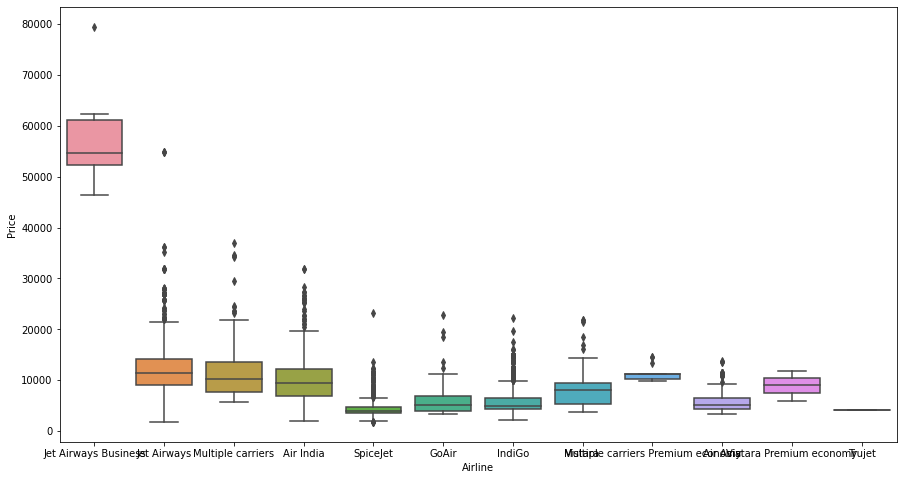

In [111]:
# airline with resp(ect to price column
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [112]:
#with respect to jet airways..box is distribution
#bottom line shows 25% data
#middle line shows median
#upper part shows 75% data

In [113]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

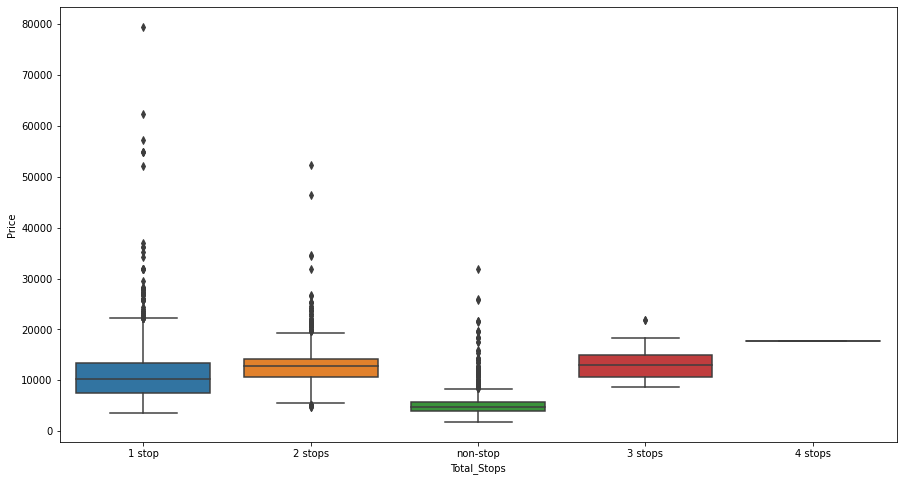

In [114]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [115]:
#flights which hve one stop have more outliers and are expensive
# those with 4 stops dont fluctuate


In [116]:
# airline col to be converted into some integer format...
# i.e. one hot enco
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)
#then we will use drop_first=True.... otherwise we will get repeated values

In [117]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [118]:
# now we will dummified the source data
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

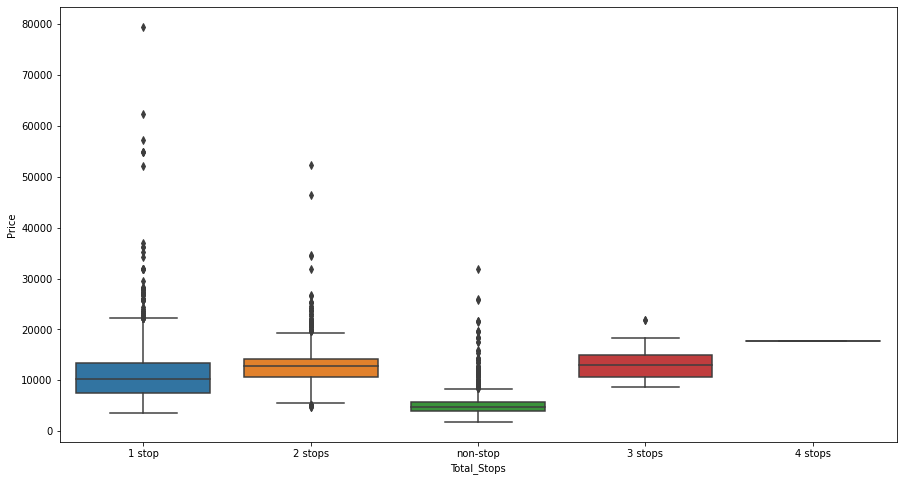

In [119]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [120]:
# bangalore has high fluctuation in data
# delhi has high median


In [1]:
# now we need to dummify the source 
Source= pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

NameError: name 'pd' is not defined

In [122]:
# dummify destination aswell
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

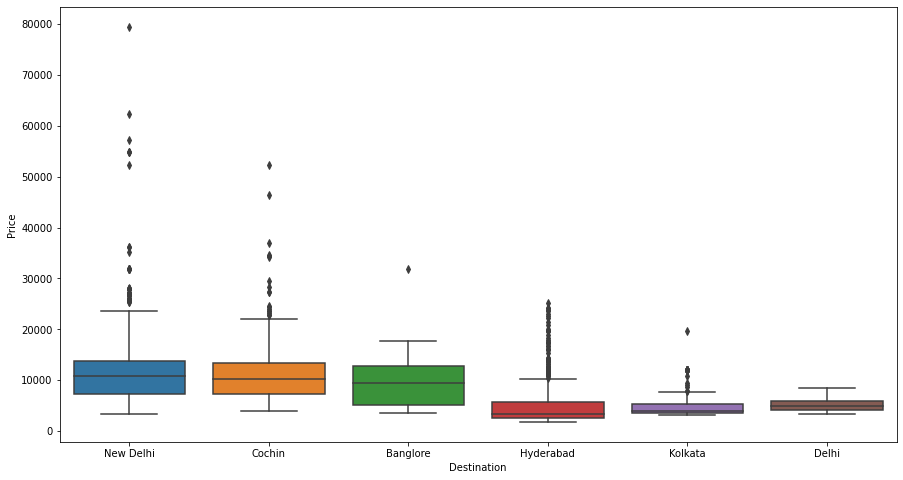

In [123]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [124]:
# newdelhi.....has highest price and calcutta has lowest price
# now dummify destination..............
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [125]:
# ROUTE feature 

In [126]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\279739503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→').str[0]
C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\279739503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→').str[1]
C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\279739503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [127]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [128]:
# to drop unwanted column from dataset
drop_column(categorical,'Route')


C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\1399768589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1, inplace=True)


In [129]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [130]:
# snce above there are several missing values 
#sooo now we will replace null values by none



In [131]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\2414967305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [132]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [133]:
# now none are null

In [134]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


# since 

ROUTE 2,3 AND 4 STILL HAVE LARGER NUMBER OF CATEGORICAL DATA.....
SO IN THIS CASE WE CANNOT APPLY ONE HOT ENCODING BECAUSE IT MIGHT INCREASE THE NO. OF COLUMNS

In [135]:
# SO....now we will use label encoder

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
encoder= LabelEncoder()

In [138]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [139]:
# we will iterate on each columns
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\539350169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [140]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [141]:
# since additional_info has most of rows as no info so we 
#will drop this col

drop_column(categorical,'Additional_Info')

C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\1399768589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1, inplace=True)


In [142]:
# now dealing with total stops....
categorical['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [143]:
# we can replace non stop with 0,,, 1 stop with 1 and so on..
# here we will use customized method and not scikit learn method

In [144]:
dict={'non-stop':0, '2 stops': 2, '1 stop':1, '3 stops': 3, '4 stops': 4}

In [145]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\ZISHAAN\AppData\Local\Temp\ipykernel_6820\4198516256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [146]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [147]:
# new data is being made from the previous data
#now we need to concat all the categorical dataframes

In [148]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis = 1)

In [149]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [150]:
# drop extra features

drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')


In [151]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [152]:
# if you want to visualise all the 35 cols then..........


In [153]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


DEAL with outliers and also
Serparate out your dependent and independent feature

In [154]:
# outlier in price columns
# whenever to deal with outliers we need to use handy visulisations  
# box plot and distribution approach


In [155]:
def plot(df,col):
    fig,(ax1,ax2) =plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


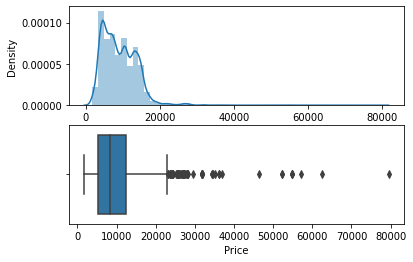

In [156]:
plot(data_train,'Price')

In [157]:
# since there are alot of outlier...
#we need to replace some with median
data_train['Price']= np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


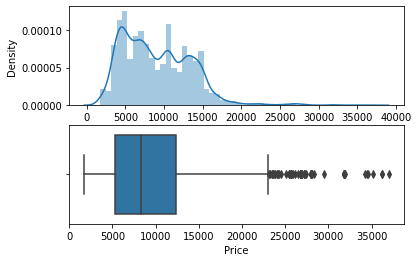

In [158]:
plot(data_train,'Price')

In [159]:
# separate dependent features and independent features...



In [160]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [161]:
X.shape

(10682, 34)

In [162]:
y=data_train['Price']

FEATURE SELECTION 

In [163]:
# TO SELECT IMPORTANT FEATURES 


In [164]:
from sklearn.feature_selection import mutual_info_classif

In [179]:
mutual_info_classif(X,y)

array([2.14453563, 2.03099074, 2.79588927, 2.28029684, 1.47315682,
       0.70340283, 0.738214  , 0.0972632 , 0.67275479, 0.93607588,
       0.00732137, 0.56528452, 0.        , 0.32453967, 0.00743599,
       0.22303415, 0.00585184, 0.17068316, 1.53095499, 0.89041664,
       0.29459971, 1.54622272, 0.40165042, 0.28883244, 0.17699631,
       0.37571345, 1.06994528, 0.89609135, 1.42864519, 1.21515741,
       1.82499152, 1.49968914, 1.76567455, 1.06436677])

In [166]:
# all columns with respect to priority value as well


In [ ]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

In [168]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending =False)

,importance
Route_2,2.796671
Route_3,2.315464
Total_Stops,2.173718
Route_1,2.014056
Arrival_Time_hour,1.849535
Duration_hour,1.775564
Cochin,1.530629
Delhi,1.525054
Arrival_Time_minute,1.506142
Route_4,1.472864


RANDOM FOREST CLASSIFIER

In [169]:
# RANDOM FOREST IS USED FOR BOTH CLASSIFICATION AS WELL AS REGRESSION PROBLEM

# IT uses ENSEMBLE learning approach...
#.ie it learns from multiple models and in the end it will combine all the learning

In [170]:
# apply machine learning algorithm on our data

AUTOMATE ALL OUR PREDICTIONS

In [171]:
#by using sklearn we have r2 score\\ mse \\ rmse \\ 
#mae  (mean absolute error)...........
#from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [188]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [205]:
def predict(ml_model,dump):
    model =ml_model.fit(X_train,y_train)
    print('training score : {}'.format(model.score(X_train,y_train)) )
    y_prediction=model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2_score is {}'.format(r2_score))
    
    print('MAE :',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE :',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
# if we get normal distribution then it is performing well...       
 # DUMPING MODEL
    # open my file in write form....
    if dump==1:
        filename="AIRLINE FARE PREDICTION.pkl" 
        file=open('filename','wb')
        pickle.dump(model,file)
        


In [175]:
# call this predict function.....

training score : 0.9543302068590211
predictions are : [14027.849  10120.88   12449.7475 ...  4974.95    9754.0875 12820.5775]


r2_score is 0.8037338905780497
MAE : 1142.845624594599
MSE : 3741735.965252053
RMSE : 1934.3567316428614


c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


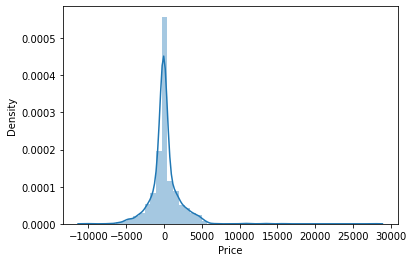

In [206]:
from sklearn.ensemble import RandomForestRegressor 
predict(RandomForestRegressor(),1)

In [177]:
#for regression use regressor
#for classification use classifier


In [ ]:
  # JUST DO DUMPING TO SAVE YOUR MODEL FROM

In [181]:
import pickle

 DEAL WITH MULTIPLE ALGORITHMS ......DECISION TREE, RANDOM FOREST

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

training score : 0.6190139570549085
predictions are : [11907.171875   8961.0625    11523.578125  ...  4058.4453125  9992.578125
 11310.984375 ]


r2_score is -689959370021.3969
MAE : 78457435.86129797
MSE : 1.315380325711353e+19
RMSE : 3626817235.140686


c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


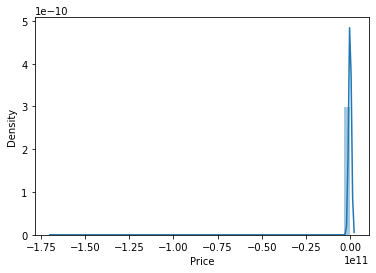

In [217]:
predict(LinearRegression(),0)

training score : 0.9674135935344454
predictions are : [14714. 10203. 12373. ...  4823.  9646. 12373.]


r2_score is 0.7306317406111459
MAE : 1290.1774840118546
MSE : 5135399.621570608
RMSE : 2266.142012666154


c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


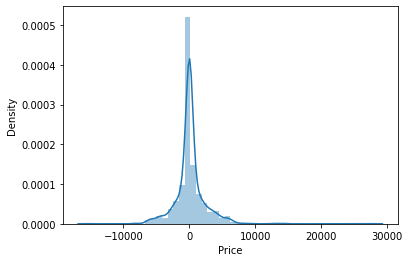

In [219]:
predict(DecisionTreeRegressor(),1)

K NEAREST NEIGHBORS 

training score : 0.791776073575884
predictions are : [13523.4 11931.6 12160.8 ...  4823.   8068.  13433.2]


r2_score is 0.6188559585408744
MAE : 1738.8177819372954
MSE : 7266360.820364999
RMSE : 2695.6188195598056


c:\users\zishaan\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


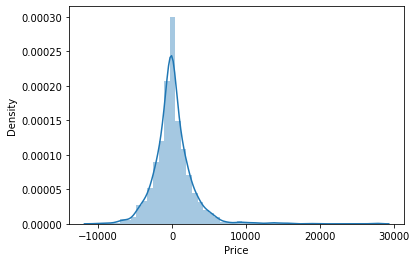

In [220]:
predict(KNeighborsRegressor(),0)

In [ ]:
#if dataset is huge never go with KNN

In [221]:
# cross validation 
#how cross validation increases accuracy

In [ ]:
#regression usecase 
# classification usecase
# we have inbuilt function ie train_test_split
# random_state = 0 ,,, then here we can select
#no. of rows in random way
# if random_state = 2 , then training data will change
# test_size.....


In [ ]:
#i have achieved accuracy btw thee ranges

In [ ]:
# each time random_state value changes ..it affects accuracy

In [ ]:
# to get rid of this issue we have cross validation

CROSS VALIDATION

K fold

Grid Search

Randomized search

optuna

# by default cv value is 5
eg: 
    you have thousands data
    so in first time cross validation ie 1st cv
    it will consider last 20% data as test data
    
    when cv=2 
    at second iteration
    first 60% data and last 20% data will be training data
    and middle 20% data is testin data
    similarly when cv=3
    middle 20% will onyly be testing data
    
    in fourth iteration
    left second 20% will be considered 
    
    in fifth iteration 
    left most 20% will be considered
    

 IN EACH AND EVERY CHUNK OF DATA , IT HAS SOME ACCURACY
 SO NOW CALCULATING MEAN OF ACCURACY WILL DEF GIVE 
 FINAL ACCURACY
 
 # ADVANTAGE OF CROSS VALIDATION OF DATA

Intuition behind crossvalidation of data

# hyperparameter optimization


whatever ml algo that u have implimanted of data

say..
you have use cases ( classifier,,,regression)

In [222]:
# eg : in random forest classifier we have parameter called 
# n_estimators : ( no. of decision tree    
#max_features
# max_depth 
# default values are already in sklearn module

# gridsearch cv  and randomizedSearch cv

to have best value of these parameters we have this
GridSearch cv

In [ ]:
# we have classification usecase


In [ ]:
#define dictionary

In [224]:
##GridSearchCV(algo,param_grid=dict,cv=5)

In [ ]:
# which pair gives max accuracy....


# randomized search cv

In [ ]:
# gridsearch cv we are performing permuttion and combination
#but in  randomized search CV we pick random vparameters

In [ ]:
# in terms of computation power
#then random search is better than grid search cv
# it takes les time than grid


# how to cross validate your model

In [225]:
# hypertune your model
#these model hypertune techniques are used to select best parameters for max accuracy 

In [ ]:
# imprt my RandomizedSearchCV
# max_features is to consider no. of features 
#to be considered at every split of decision tree

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
reg_rf= RandomForestRegressor()

In [226]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomizedSearchCV()

In [229]:
n_estimators=[ int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth= [int(x) for x in np.linspace(start= 5,stop=30 ,num=4)]

In [230]:
# create a dictionary.........
random_grid= {
    'n_estimators': n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [231]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
# verbos actually shws that whatever activity  is going on
#across cell
#n_jobs uses all resources of CPU

In [237]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions= random_grid,cv=3,verbose=2,n_jobs=-1)

In [238]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [239]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [240]:
prediction=rf_random.predict(X_test)

In [243]:
prediction

array([13048.69535814,  9680.60015238, 12176.42937296, ...,
        4874.49142931,  9265.6666831 , 13130.0601562 ])

<AxesSubplot:xlabel='Price', ylabel='Density'>

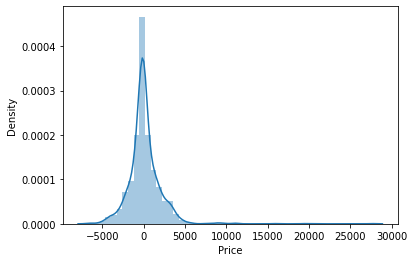

In [246]:
sns.distplot(y_test-prediction)
# actual data -(minus) predicted data

In [259]:
# check accuracy
metrics.r2_score(y_test,prediction)

0.8037235170555163

In [248]:
file= open('airline fare prediction','wb')

In [249]:
pickle.dump(rf_random,file)

In [ ]:
# want to predict accuracy using the dumped model
# for that we need to load that model that is being dumped




In [254]:
model=open('airline fare prediction','rb')
forest =pickle.load(model)

In [256]:
predictions2=forest.predict(X_test)

In [260]:
metrics.r2_score(y_test,predictions2)

0.8037235170555163

In [261]:
# if we have new data we just need to pass it to bracket in predict()